# Artificial Neural Network 실습

# 1. 데이터 불러오기, 및 Neural Network 적합

In [3]:
X = [[0., 0.], [1., 1.]] #첫번째 관측치[0,0]
y = [[0, 1], [1, 1]]

- 함수 불러오기

In [4]:
from sklearn.neural_network import MLPClassifier

- 모델 적합

In [5]:
clf=MLPClassifier(solver="lbfgs",alpha=5,hidden_layer_sizes=[5,2],random_state=1) #alpha가 클수록 간단한 모델
clf.fit(X,y)
#첫번째 히든레이어는 5개 두번쨰 히든레이어는 2개

MLPClassifier(activation='relu', alpha=5, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[5, 2], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [6]:
clf.predict([[2,2],[-1,-2]])

array([[0, 1],
       [0, 1]])

In [7]:
clf.coefs_ #각각의 w
#array1:히든레이어1(노드5개) array2:히든레이어2, array3:히든레이어3

[array([[-7.88634248e-07, -4.24800192e-06, -4.75098154e-06,
         -3.28083096e-06, -3.35728046e-06],
        [-3.87446991e-06, -9.32382210e-06, -1.46781203e-06,
         -2.38330870e-06,  3.68919564e-07]]),
 array([[ 1.62014660e-06, -7.85946500e-07],
        [ 2.33828530e-05, -3.41781186e-06],
        [-2.86928485e-06,  2.85831763e-06],
        [-5.13091939e-07, -1.77324220e-06],
        [ 1.82786052e-06,  3.57725412e-06]]),
 array([[-2.27820581e-05, -7.17405840e-06],
        [ 4.75430691e-06, -5.04990158e-06]])]

In [8]:
[coef.shape for coef in clf.coefs_]
#첫번째 히든레이어 노드 5개 두번째 2개, x1,x2

[(2, 5), (5, 2), (2, 2)]

# 2. model의 복잡도에 따른 퍼포먼스 비교

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

- 설정할 parameter들을 입력. h는 시각화를 얼마나 자세하게 할 것인가에 대한 위한 임의의 값.

In [11]:
h = .02 #그래프 그릴때 필요한것
alphas = np.logspace(-5, 3, 5)
names = ['alpha ' + str(i) for i in alphas]

In [12]:
alphas

array([1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03])

In [13]:
names

['alpha 1e-05', 'alpha 0.001', 'alpha 0.1', 'alpha 10.0', 'alpha 1000.0']

In [14]:
classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(solver='lbfgs', alpha=i, random_state=1,
                                     hidden_layer_sizes=[100, 100]))

- 데이터 생성

In [15]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)

In [16]:

pd.DataFrame(X).head()

,0,1
0,-0.605416,1.296708
1,1.354900,-0.046877
2,1.780375,1.099858
3,1.436615,0.807641
4,0.721669,1.168160


In [17]:
pd.DataFrame(y).head()

,0
0,1
1,0
2,1
3,1
4,1


In [18]:
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

- 여러 모양의 추가 데이터셋 생성

In [19]:
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1

<Figure size 1224x648 with 0 Axes>

C:\Users\Younjiei\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Younjiei\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Younjiei\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

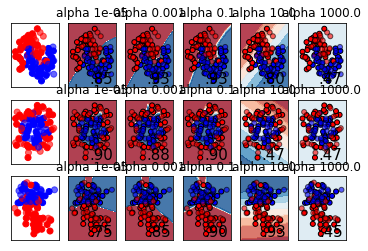

In [20]:
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()